In [58]:
# Importing the required Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import seaborn as sns

In [59]:
# Reading dataset from .csv file

dataset = pd.read_csv('sample_data/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
print("Missing values in the Insulin column")
print("Total : ", dataset[dataset.Insulin == 0].shape[0])
print(dataset[dataset.Insulin == 0].groupby('Outcome')['Age'].count())
print("Missing values in the BMI column")
print("Total : ", dataset[dataset.BMI == 0].shape[0])
print(dataset[dataset.BMI == 0].groupby('Outcome')['Age'].count())
print("Missing values in the SkinThickness column")
print("Total : ", dataset[dataset.SkinThickness == 0].shape[0])
print(dataset[dataset.SkinThickness == 0].groupby('Outcome')['Age'].count())
print("Missing values in the Bloodpressure column")
print("Total : ", dataset[dataset.BloodPressure == 0].shape[0])
print(dataset[dataset.BloodPressure == 0].groupby('Outcome')['Age'].count())
print("Missing values in the Glucose column")
print("Total : ", dataset[dataset.Glucose == 0].shape[0])
print(dataset[dataset.Glucose == 0].groupby('Outcome')['Age'].count())
print("Missing values in the Pregnancies column")
print("Total : ", dataset[dataset.Pregnancies == 0].shape[0])
print(dataset[dataset.Pregnancies == 0].groupby('Outcome')['Age'].count())




Missing values in the Insulin column
Total :  374
Outcome
0    236
1    138
Name: Age, dtype: int64
Missing values in the BMI column
Total :  11
Outcome
0    9
1    2
Name: Age, dtype: int64
Missing values in the SkinThickness column
Total :  227
Outcome
0    139
1     88
Name: Age, dtype: int64
Missing values in the Bloodpressure column
Total :  35
Outcome
0    19
1    16
Name: Age, dtype: int64
Missing values in the Glucose column
Total :  5
Outcome
0    3
1    2
Name: Age, dtype: int64
Missing values in the Pregnancies column
Total :  111
Outcome
0    73
1    38
Name: Age, dtype: int64


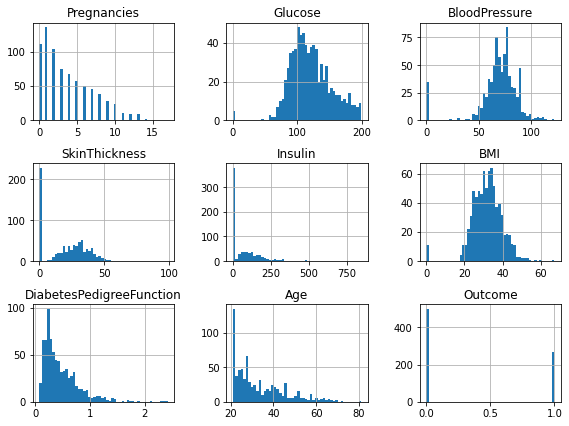

In [62]:
dataset.hist(bins=50, figsize = (8.0, 6.0))
plt.tight_layout(True)
plt.show()

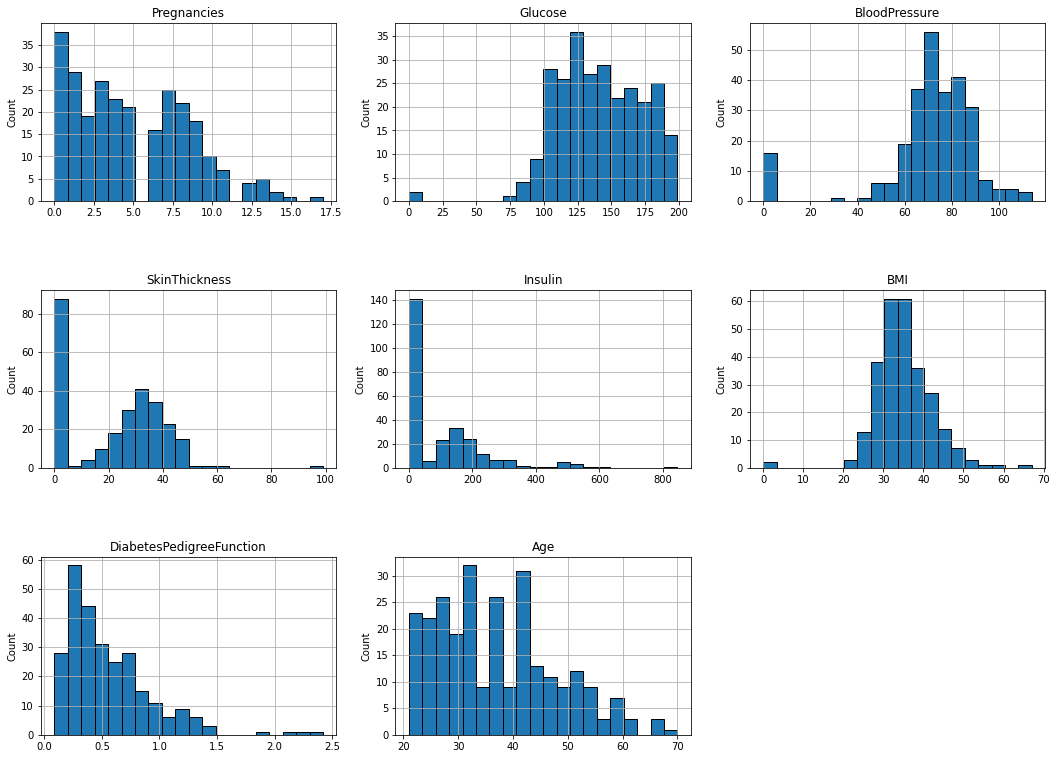

In [63]:
# Analysis of Diabetic Cases

dataset1 = dataset[dataset["Outcome"]==1]
columns = dataset.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    dataset1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

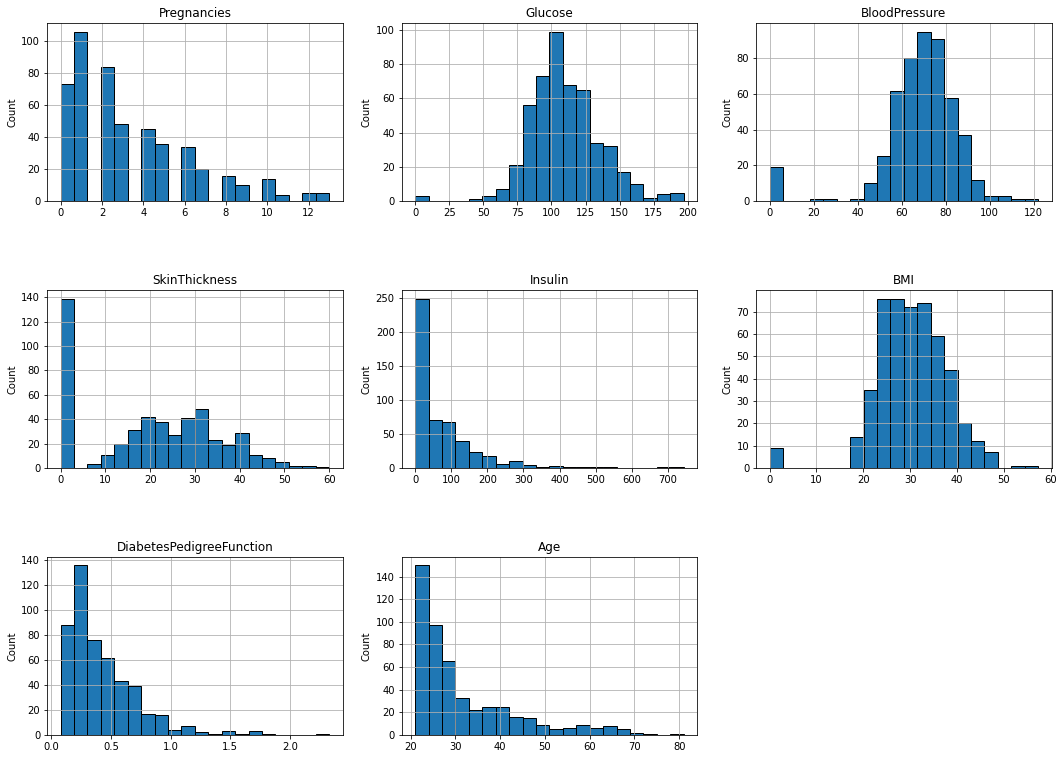

In [64]:
#General Analysis

dataset2 = dataset[dataset["Outcome"]==0]
columns = dataset.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    dataset2[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

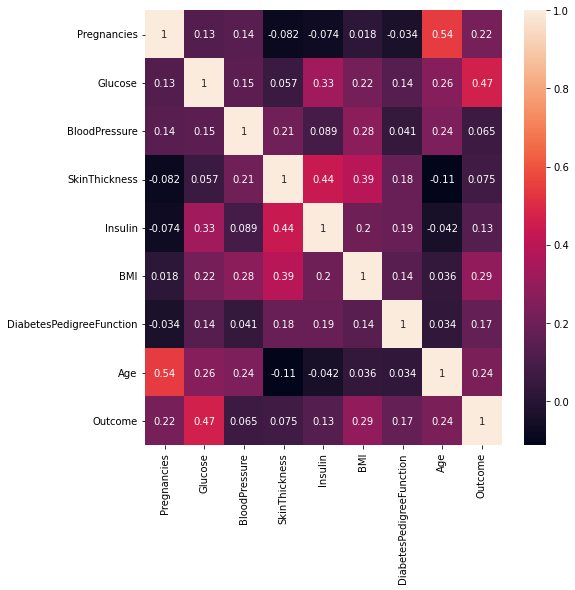

In [65]:
sns.heatmap(dataset.corr(),annot=True)
fig = plt.gcf()
fig.set_size_inches(8,8)

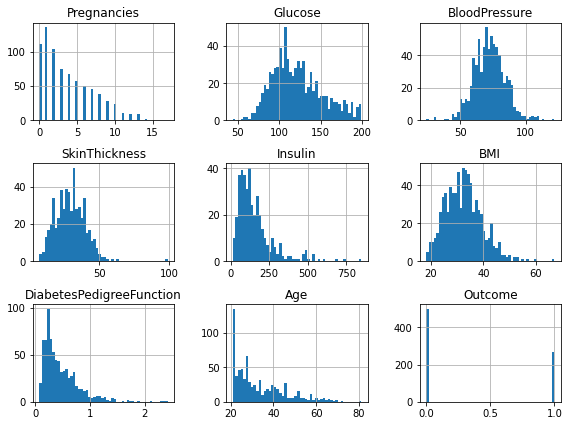

In [66]:
# Replacing the missing or null entries in dataset by np.Nan

# Plotting the histograms of various parameters (columns) in dataset

col_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for c in col_missing:
   dataset[c] = dataset[c].replace(0, np.nan)
dataset.hist(bins=50, figsize = (8.0, 6.0))
plt.tight_layout(True)
plt.show()


In [67]:
# Checking the summary stastics of the given dataset

dataset.describe().round(2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,763.00,733.00,541.00,394.00,757.00,768.00,768.00,768.00
mean,3.85,121.69,72.41,29.15,155.55,32.46,0.47,33.24,0.35
std,3.37,30.54,12.38,10.48,118.78,6.92,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,64.00,22.00,76.25,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,29.00,125.00,32.30,0.37,29.00,0.00
75%,6.00,141.00,80.00,36.00,190.00,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [68]:
# Checking the top values

dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [69]:
# Splitting the X and y in test and train sets. Train will be used to fit in the model for doing the 
# predictions on the test set

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


**Replace OUTLIERS with median values**

In [70]:
# Splitting the X and y in test and train sets. Train will be used to fit in the model for doing the 
# predictions on the test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [71]:
# SimpleImputer is used to handle the np.NaN values
# Replacing the missing values with median

from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.NaN, strategy='median')
X_train = impute.fit_transform(X_train)
X_test = impute.fit_transform(X_test)

**Classification Using Logistic regression**

In [72]:
# StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 13)))
models.append(('SVC', SVC(kernel= 'linear', random_state = 0)))
models.append(('LR', LogisticRegression(random_state = 0)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
names = []
Accuracy_Score = []
ROC_AUC_Score = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Accuracy_Score.append(accuracy_score(y_test, y_pred))
    ROC_AUC_Score.append(roc_auc_score(y_test,y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Accuracy_Score': Accuracy_Score,'ROC_AUC_Score': ROC_AUC_Score})
tr_split = tr_split.sort_values(by=['ROC_AUC_Score'], ascending=False)
print(tr_split)
tr_split = tr_split.sort_values(by=['Accuracy_Score'], ascending=False)
print(tr_split)

  Name  Accuracy_Score  ROC_AUC_Score
3   DT        0.774892       0.755810
0  KNN        0.796537       0.736013
6   GB        0.770563       0.720477
4  GNB        0.761905       0.699819
1  SVC        0.766234       0.692288
5   RF        0.770563       0.691900
2   LR        0.761905       0.689103
  Name  Accuracy_Score  ROC_AUC_Score
0  KNN        0.796537       0.736013
3   DT        0.774892       0.755810
6   GB        0.770563       0.720477
5   RF        0.770563       0.691900
1  SVC        0.766234       0.692288
4  GNB        0.761905       0.699819
2   LR        0.761905       0.689103


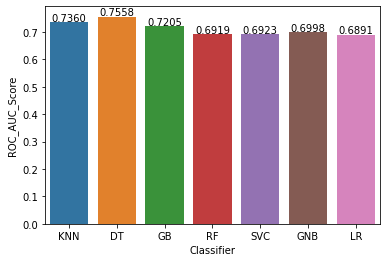

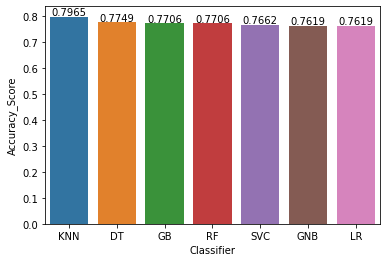

In [76]:
axis = sns.barplot(x = 'Name', y = 'ROC_AUC_Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='ROC_AUC_Score')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

axis = sns.barplot(x = 'Name', y = 'Accuracy_Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy_Score')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()